<a href="https://colab.research.google.com/github/ishancoderr/3D_modeling/blob/main/tweety01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 	Choose an event/campaign that happened in the UK or worldwide recently (eg., Brexit). Apply sentiment analysis to show users’ opinions about the topic on Twitter. Represent your findings using statistical descriptive methods. 

In [131]:
import tweepy
from textblob import TextBlob
consumer_key='MiPlOEtMiZDUU0A286jcN3jrr'
consumer_secret_key='O9nv0WXPkcHgu6ry2CweZOgp08lA19na5TXxWQNl4Xw1FiH5NI'
access_token='1498074007-l0DlAvQPXooOd5oNJCCuV9LIHa3yzjUgT1VBl7R'
access_token_secret='oFqbnqacvyLxuDUrNF4Jzao0W7TaHBwFc9odVxQ9GvjA4'

In [132]:
auth=tweepy.OAuthHandler(consumer_key,consumer_secret_key)
auth.set_access_token(access_token,access_token_secret)
api=tweepy.API(auth)
posts=api.user_timeline(screen_name='Brexit',count=100,lang="en",tweet_mode="extended")
print('Show the 5 recent tweets:\n')
for tweet in posts[0:5]:
  print(tweet.full_text+'\n')


Show the 5 recent tweets:

RT @Joe_Mayes: This week I was in Hartlepool and here's what I learnt about British politics in a Brexit heartland 1/ https://t.co/Q0qPCMjd…

Northern Irish voters continue to oppose uniting the two sides of the island, a poll shows https://t.co/X1jMErLvr4

Boris Johnson believes the British public is unfussed by his “cash for curtains” scandal, but class is dangerous territory in the U.K., says Martin Ivens https://t.co/eLC3PwGFES

Boris Johnson is trying to win another district in Labour's heartland just as he faces a scandal over allegations about his conduct https://t.co/CJgY29oB6T

Here's why Scotland’s road to independence is rocky https://t.co/KuBeWmsmQL



In [133]:
import pandas as pd

df=pd.DataFrame([tweet.full_text for tweet in posts],columns=['Tweets'])
df.head()

,Tweets
0,RT @Joe_Mayes: This week I was in Hartlepool a...
1,Northern Irish voters continue to oppose uniti...
2,Boris Johnson believes the British public is u...
3,Boris Johnson is trying to win another distric...
4,Here's why Scotland’s road to independence is ...


In [134]:
import re
#cleaning data
def cleanData(text):
  text=re.sub(r'@[A-Za-z0-9]+','',text)#Remove @mentions
  text=re.sub(r'#','',text)#Remove #mentions
  text=re.sub(r'RT[\s]+','',text)#Remove RT mentions
  text=re.sub(r'https?:\/\/\S+','',text)#Remove hyper links

  return text

df['Tweets']=df['Tweets'].apply(cleanData)

#show data
df

,Tweets
0,_Mayes: This week I was in Hartlepool and here...
1,Northern Irish voters continue to oppose uniti...
2,Boris Johnson believes the British public is u...
3,Boris Johnson is trying to win another distric...
4,Here's why Scotland’s road to independence is ...
...,...
95,"Biden tackles gun violence, while the true sca..."
96,The British monarchy has survived exactly beca...
97,: EXPLAINED: What's behind the violence in Nor...
98,: ⚡️ What's behind the violence in Northern Ir...


In [135]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

df['subjectivity']=df['Tweets'].apply(getSubjectivity)
df['Polarity']=df['Tweets'].apply(getPolarity)
df

,Tweets,subjectivity,Polarity
0,_Mayes: This week I was in Hartlepool and here...,0.000000,0.00
1,Northern Irish voters continue to oppose uniti...,0.000000,0.00
2,Boris Johnson believes the British public is u...,0.322222,-0.20
3,Boris Johnson is trying to win another distric...,0.400000,0.80
4,Here's why Scotland’s road to independence is ...,0.000000,0.00
...,...,...,...
95,"Biden tackles gun violence, while the true sca...",0.375000,0.20
96,The British monarchy has survived exactly beca...,0.426667,0.07
97,: EXPLAINED: What's behind the violence in Nor...,0.700000,-0.40
98,: ⚡️ What's behind the violence in Northern Ir...,0.700000,-0.40


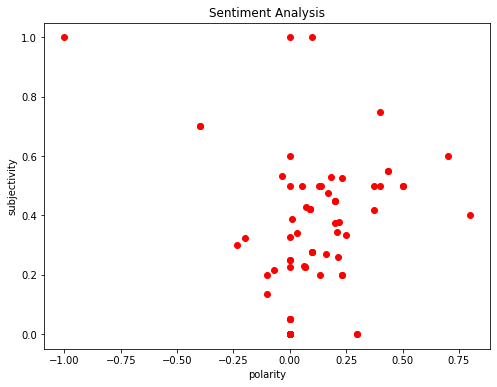

In [136]:
import matplotlib.pyplot as plt
%matplotlib inline
#plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i],df['subjectivity'][i],color='red')

plt.title('Sentiment Analysis')
plt.xlabel('polarity')
plt.ylabel('subjectivity')
plt.show()

[0.0, 0.0, 0.32222222222222224, 0.4, 0.0, 0.0, 0.25, 0.0, 0.25, 0.3333333333333333, 0.41666666666666663, 0.05, 0.5277777777777778, 0.5, 0.0, 0.05, 0.0, 0.13333333333333333, 0.21428571428571427, 0.0, 0.5, 0.0, 0.0, 0.0, 0.26988636363636365, 0.0, 0.22625, 0.0, 0.0, 0.0, 0.0, 0.45, 0.75, 0.45, 0.19999999999999998, 0.45, 0.22916666666666666, 0.0, 0.5, 0.0, 0.0, 0.5333333333333333, 0.0, 0.0, 0.0, 0.47590909090909095, 0.0, 0.19999999999999998, 0.0, 0.0, 0.19999999999999998, 0.0, 0.0, 0.3888888888888889, 0.0, 0.2, 0.0, 0.5, 0.0, 0.0, 0.34166666666666673, 0.42000000000000004, 0.275, 0.0, 0.0, 0.22727272727272727, 0.3, 0.3444444444444445, 0.0, 0.275, 1.0, 0.275, 0.0, 0.5499999999999999, 0.42000000000000004, 0.0, 0.5499999999999999, 0.42000000000000004, 0.5, 0.0, 0.6, 0.22727272727272727, 1.0, 0.05, 0.37777777777777777, 0.49756493506493504, 0.5266666666666666, 0.0, 0.5, 0.25833333333333336, 0.6000000000000001, 0.5, 0.0, 0.3277777777777778, 1.0, 0.375, 0.42666666666666664, 0.7, 0.7, 0.0]
{0.0: 40

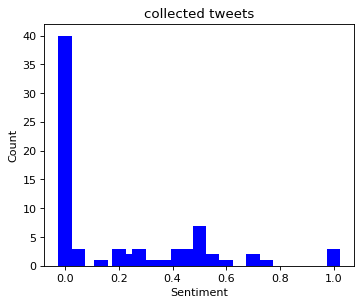

In [125]:
from collections import Counter
import numpy as np
m=df['subjectivity']
n= np.array(m) 
A=[]
for i in range(len(n)):
  s=n[i]
  A.append(s)

print(A)
a = dict(Counter(A))
print(a)
a_dictionary = a
keys = a_dictionary.keys()
values = a_dictionary.values()
plt.figure(figsize=(5,4), dpi= 80)

plt.bar(keys, values, color='blue', width=0.05)
plt.title('collected tweets')
plt.xlabel('Sentiment')
plt.ylabel('Count')

plt.show()

[0.0, 0.0, -0.19999999999999998, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.375, 0.0, 0.18333333333333335, 0.13636363636363635, 0.0, 0.0, 0.0, -0.09999999999999999, -0.07142857142857142, 0.0, 0.5, 0.0, 0.0, 0.0, 0.1590909090909091, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.4, 0.2, 0.13333333333333333, 0.2, 0.0625, 0.0, 0.375, 0.0, 0.0, -0.033333333333333354, 0.0, 0.0, 0.0, 0.16893939393939394, 0.0, 0.2333333333333333, 0.0, 0.0, 0.2333333333333333, 0.0, 0.0, 0.011111111111111108, 0.0, -0.1, 0.0, 0.05208333333333334, 0.0, 0.0, 0.03333333333333333, 0.09, 0.1, 0.0, 0.3, 0.06818181818181818, -0.2333333333333333, 0.2111111111111111, 0.0, 0.1, -1.0, 0.1, 0.0, 0.43333333333333335, 0.09, 0.0, 0.43333333333333335, 0.09, 0.5, 0.0, 0.0, 0.06818181818181818, 0.1, 0.0, 0.21666666666666667, 0.1305194805194805, 0.22999999999999998, 0.3, 0.0, 0.2125, 0.7, 0.4, 0.0, 1.850371707708594e-17, 0.0, 0.19999999999999998, 0.07, -0.4, -0.4, 0.0]
{0.0: 47, -0.19999999999999998: 1, 0.8: 1, 0.25: 1, 0.375: 2, 0.1833333333333

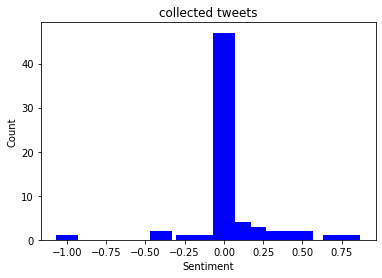

In [137]:
from collections import Counter
import numpy as np
m=df['Polarity']
n=np.array(m) 
A=[]
for i in range(len(n)):
  s=n[i]
  
  A.append(s)

print(A)
a = dict(Counter(A))
print(a)
a_dictionary = a
keys = a_dictionary.keys()
values = a_dictionary.values()
plt.bar(keys, values, color='blue', width=0.14)
plt.title('collected tweets')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

2.	**Access News APIs for articles related to the chosen event/campaign (Minimum of 5 articles)** 


*   Perform all required cleaning and pre-processing on the articles.
*   Perform basic descriptive analysis of the collected articles (time distribution, word counts. etc).

*   Use topic modelling techniques to discover key topics. Display your findings using proper graphs, such as word cloud.
* Provide a summary on one of the news articles. Comment on the summarisation quality  


In [138]:
!pip install newsapi-python

In [139]:
from newsapi import NewsApiClient
import datetime as dt
import pandas as pd

In [140]:
my_api_key='37925137cd4749ad8db14762cf5dd24d'
newsapi = NewsApiClient(api_key=my_api_key)

In [141]:
all_articles = newsapi.get_everything(q='Brexit',
                                      sources='bbc-news,the-verge',
                                      domains='bbc.co.uk,techcrunch.com',
                                      language='en',
                                      sort_by='relevancy',
                                      page=2)

In [142]:
type(all_articles)

dict

In [143]:
all_articles.keys()

dict_keys(['status', 'totalResults', 'articles'])

In [144]:
all_articles['status']

'ok'

In [145]:
all_articles['totalResults']

119

In [146]:
x=all_articles['articles']

In [147]:
df=pd.DataFrame(x)
                            
df.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'bbc-news', 'name': 'BBC News'}",https://www.facebook.com/bbcnews,Arlene Foster to step down as DUP leader - BBC...,<ol><li>Arlene Foster to step down as DUP lead...,https://www.bbc.co.uk/news/live/uk-northern-ir...,https://m.files.bbci.co.uk/modules/bbc-morph-n...,2021-04-28T15:15:49Z,"The opinions of grassroots unionists ""are bein..."
1,"{'id': 'bbc-news', 'name': 'BBC News'}",https://www.facebook.com/bbcnews,Wales election: Details on independent Wales '...,Plaid Cymru has pledged to hold an independenc...,https://www.bbc.co.uk/news/uk-wales-politics-5...,https://ichef.bbci.co.uk/news/1024/branded_new...,2021-04-19T20:29:46Z,image copyrightGetty Images\r\nimage captionAd...
2,"{'id': 'bbc-news', 'name': 'BBC News'}",https://www.facebook.com/bbcnews,Brexit: Euro MPs' vote bolsters EU-UK trade deal,The key Brexit trade deal now stands a better ...,https://www.bbc.co.uk/news/world-europe-56765681,https://ichef.bbci.co.uk/news/1024/branded_new...,2021-04-15T17:30:15Z,image captionZeebrugge: Channel ports have new...
3,"{'id': 'bbc-news', 'name': 'BBC News'}",None,What it's like driving across the new Irish tr...,Three months since the creation of the new Iri...,https://www.bbc.co.uk/news/av/uk-northern-irel...,https://ichef.bbci.co.uk/images/ic/400xn/p09ck...,2021-04-01T23:07:43Z,"The ferry operator, Stena Line, says Brexit is..."
4,"{'id': 'bbc-news', 'name': 'BBC News'}",None,Keeping score on UK-EU relations since Brexit,"Despite promises to work together, it has been...",https://www.bbc.co.uk/news/av/uk-politics-5657...,https://ichef.bbci.co.uk/images/ic/400xn/p09c6...,2021-03-29T23:00:56Z,The relationship between the UK and the EU sin...


**Perform all required cleaning and pre-processing on the articles**

In [148]:
import re
#cleaning data
def cleanData(text):
  text=re.sub(r'@[A-Za-z0-9]+','',text)#Remove @mentions
  text=re.sub(r'#','',text)#Remove #mentions
  text=re.sub(r':','',text)#Remove :
  text=re.sub(r',','',text)#Remove ,
  text=re.sub(r'RT[\s]+','',text)#Remove RT mentions
  text=re.sub(r'https?:\/\/\S+','',text)#Remove hyper links

  return text

df['description']=df['description'].apply(cleanData)
df['title']=df['title'].apply(cleanData)
df['content']=df['content'].apply(cleanData)
df['index'] = df.index
#show data
df.head()

,source,author,title,description,url,urlToImage,publishedAt,content,index
0,"{'id': 'bbc-news', 'name': 'BBC News'}",https://www.facebook.com/bbcnews,Arlene Foster to step down as DUP leader - BBC...,<ol><li>Arlene Foster to step down as DUP lead...,https://www.bbc.co.uk/news/live/uk-northern-ir...,https://m.files.bbci.co.uk/modules/bbc-morph-n...,2021-04-28T15:15:49Z,"The opinions of grassroots unionists ""are bein...",0
1,"{'id': 'bbc-news', 'name': 'BBC News'}",https://www.facebook.com/bbcnews,Wales election Details on independent Wales 'n...,Plaid Cymru has pledged to hold an independenc...,https://www.bbc.co.uk/news/uk-wales-politics-5...,https://ichef.bbci.co.uk/news/1024/branded_new...,2021-04-19T20:29:46Z,image copyrightGetty Images\r\nimage captionAd...,1
2,"{'id': 'bbc-news', 'name': 'BBC News'}",https://www.facebook.com/bbcnews,Brexit Euro MPs' vote bolsters EU-UK trade deal,The key Brexit trade deal now stands a better ...,https://www.bbc.co.uk/news/world-europe-56765681,https://ichef.bbci.co.uk/news/1024/branded_new...,2021-04-15T17:30:15Z,image captionZeebrugge Channel ports have new ...,2
3,"{'id': 'bbc-news', 'name': 'BBC News'}",None,What it's like driving across the new Irish tr...,Three months since the creation of the new Iri...,https://www.bbc.co.uk/news/av/uk-northern-irel...,https://ichef.bbci.co.uk/images/ic/400xn/p09ck...,2021-04-01T23:07:43Z,The ferry operator Stena Line says Brexit is s...,3
4,"{'id': 'bbc-news', 'name': 'BBC News'}",None,Keeping score on UK-EU relations since Brexit,Despite promises to work together it has been ...,https://www.bbc.co.uk/news/av/uk-politics-5657...,https://ichef.bbci.co.uk/images/ic/400xn/p09c6...,2021-03-29T23:00:56Z,The relationship between the UK and the EU sin...,4


In [149]:
new_data=df[['index','title','description','publishedAt','content']]

**Perform basic descriptive analysis of the collected articles (time distribution, word counts. etc).**

{'04': 17, '03': 2, '05': 1}


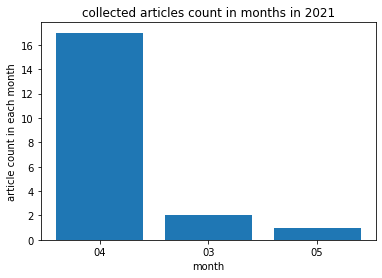

In [150]:
from collections import Counter
import numpy as np
m=new_data['publishedAt']
n=np.array(m) 
A=[]
for i in range(len(n)):
  string=n[i]
  s=string[5:7]
  A.append(s)
  
  

a = dict(Counter(A))
print(a)
a_dictionary = a
keys = a_dictionary.keys()
values = a_dictionary.values()

plt.bar(keys, values)
plt.title('collected articles count in months in 2021')
plt.xlabel('month')
plt.ylabel('article count in each month')
plt.show()

In [151]:
new_data['content_count']=new_data['content'].apply(lambda n:len(n.split(' ')))
new_data['title_count']=new_data['title'].apply(lambda n:len(n.split(' ')))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [152]:
new_data

,index,title,description,publishedAt,content,content_count,title_count
0,0,Arlene Foster to step down as DUP leader - BBC...,<ol><li>Arlene Foster to step down as DUP lead...,2021-04-28T15:15:49Z,"The opinions of grassroots unionists ""are bein...",34,11
1,1,Wales election Details on independent Wales 'n...,Plaid Cymru has pledged to hold an independenc...,2021-04-19T20:29:46Z,image copyrightGetty Images\r\nimage captionAd...,35,9
2,2,Brexit Euro MPs' vote bolsters EU-UK trade deal,The key Brexit trade deal now stands a better ...,2021-04-15T17:30:15Z,image captionZeebrugge Channel ports have new ...,29,8
3,3,What it's like driving across the new Irish tr...,Three months since the creation of the new Iri...,2021-04-01T23:07:43Z,The ferry operator Stena Line says Brexit is s...,35,10
4,4,Keeping score on UK-EU relations since Brexit,Despite promises to work together it has been ...,2021-03-29T23:00:56Z,The relationship between the UK and the EU sin...,35,7
5,5,Restaurants struggle to find staff ahead of re...,Some venues may have to limit their opening ho...,2021-04-29T23:03:34Z,By Amie Keeley Business reporter\r\nimage copy...,33,8
6,6,Arlene Foster to quit DUP after leaving leader...,Arlene Foster believes the DUP is no longer th...,2021-04-30T05:07:23Z,image captionArlene Foster has been a member o...,35,9
7,7,Arlene Foster Why did the DUP move against its...,The BBC's Jayne McCormack takes a look at what...,2021-04-28T15:16:48Z,By Jayne McCormackBBC News NI Political Report...,32,10
8,8,French warn UK ahead of vote on Brexit trade deal,French concern over fishing rights overshadows...,2021-04-27T09:21:09Z,image captionEU Commission chief Ursula von de...,32,10
9,9,Palantir NHS says future deals 'will be transp...,It follows a lawsuit accusing the NHS of “snea...,2021-03-31T14:06:06Z,image copyrightGetty Images\r\nThe NHS has pro...,31,8


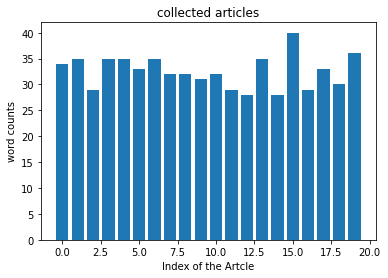

In [153]:
plt.bar(new_data['index'],new_data['content_count'])
plt.title('collected articles')
plt.xlabel('Index of the Artcle')
plt.ylabel('word counts')
plt.show()

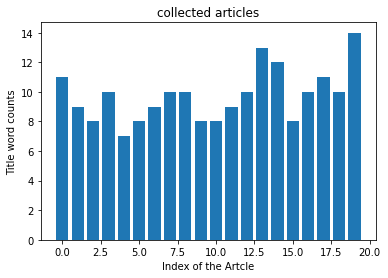

In [154]:
plt.bar(new_data['index'],new_data['title_count'])
plt.title('collected articles')
plt.xlabel('Index of the Artcle')
plt.ylabel('Title word counts')
plt.show()

**Use topic modelling techniques to discover key topics. Display your findings using proper graphs, such as word cloud.**

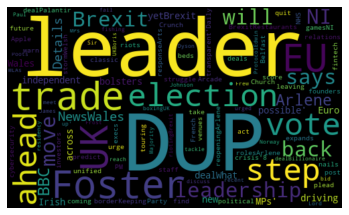

In [155]:
from wordcloud import WordCloud
#Plot the world cloud
allwords=''.join([twts for twts in new_data['title']])
WordCloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allwords)
plt.imshow(WordCloud,interpolation='bilinear')
plt.axis('off')
plt.show()

**Provide a summary on one of the news articles. Comment on the summarisation quality**

In [156]:
!pip install transformers

In [163]:
from transformers import pipeline
summarization=pipeline("summarization")

In [164]:
orginal_text=new_data['content']
y=orginal_text[0]
y


'The opinions of grassroots unionists "are being ignored" says the chairwoman of the Ulster Bands Forum.\r\nSpeaking to BBC News NI earlier Valerie Quinn from Coleraine says the DUP needs "root and … [+791 chars]'

In [162]:
summary_text=summarization(y, max_length=50)[0]['summary_text']
print("Summary:", summary_text)

Summary:  Ulster Bands Forum chairwoman Valerie Quinn from Coleraine says the DUP needs "root and … needs root" Valerie Quinn says the opinions of grassroots unionists "are being ignored" by the DUP . Valerie Quinn is the chairwoman
